In [12]:
import numpy as np
import pandas as pd
import os
from glob import glob
import pathlib
import shutil
import itertools
import matplotlib as mpl
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing import image
from PIL import Image as pillow

In [11]:
for dirname, _, _ in os.walk('Brain_Tumor_Detection'):
        print(dirname)

Brain_Tumor_Detection
Brain_Tumor_Detection/no
Brain_Tumor_Detection/yes


In [13]:
import pathlib
data_dir = "Brain_Tumor_Detection"
data_dir = pathlib.Path(data_dir)
image_count = len(list(data_dir.glob('*/*.jpg')))
print(image_count)

3000


In [13]:
yes = list(data_dir.glob('yes/*.jpg'))
no = list(data_dir.glob('no/*.jpg'))
pred = list(data_dir.glob('pred/*.jpg'))

In [23]:
directory = "Brain_Tumor_Detection/"
data_dir = pathlib.Path(directory)
pixel = []
target = []

for dataclass in glob(directory+'/*'):
    for file in glob(dataclass+'/*'):
        pixels = mpl.image.imread(file)
        pixel.append(pixels) 
        target.append(dataclass.split("/")[-1])

In [24]:
df = pd.DataFrame({'image': pixel,'target': target})
df["target"] = df.target.str.replace("pred","test_set")

In [16]:
img = image.load_img("Brain_Tumor_Detection_pred/test/pred0.jpg", target_size=(250, 250))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
img2 = image.load_img("Brain_Tumor_Detection_pred/test/pred0.jpg", target_size=(250, 250))
x2 = image.img_to_array(img2)
x2 = np.expand_dims(x2, axis=0)

x3 = np.append(x, x2, axis=0)
x3.shape

(2, 250, 250, 3)

In [17]:
def prepare_image(img_path):
    img = image.load_img(img_path, target_size=(250, 250),color_mode="grayscale")
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    return x

pred_path = "Brain_Tumor_Detection_pred"
pixel_gray_pred = np.zeros(len(list(pathlib.Path(pred_path).glob("*.jpg"))))

for file in pathlib.Path(pred_path).glob("*.jpg"):
    pixels = prepare_image(file)
    np.append(pixel_gray_pred, pixels)

np.array(pixel_gray_pred).shape

(0,)

([<matplotlib.patches.Wedge at 0x7f859b471550>,
 [Text(6.735557395310444e-17, 1.1, 'yes'),
  Text(-2.0206672185931328e-16, -1.1, 'no')],
 [Text(3.6739403974420595e-17, 0.6, '50%'),
  Text(-1.1021821192326178e-16, -0.6, '50%')])

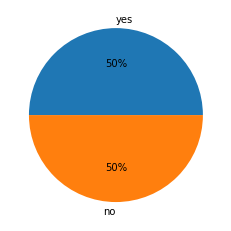

In [25]:
plt.pie(df[df.target!="test_set"].target.value_counts(), labels=['yes','no'], autopct='%0.0f%%')

In [19]:
directory2 = "brain_tumor 2/test/"
data_dir = pathlib.Path(directory2)
pixel2 = []
target2 = []

for dataclass in glob(directory2+'/*'):
    for file in glob(dataclass+'/*'):
        pixels = mpl.image.imread(file)
        pixel2.append(pixels) 
        target2.append(dataclass.split("/")[-1])

In [20]:
df2 = pd.DataFrame({'image': pixel2,'target': target2})
df2["target"] = df2.target.str.replace("pred","test_set")

([<matplotlib.patches.Wedge at 0x7f8596fc0760>,
 [Text(-0.5473569901231438, 0.9541490058493657, 'yes'),
  Text(0.5473569901231433, -0.9541490058493659, 'no')],
 [Text(-0.29855835824898747, 0.5204449122814722, '67%'),
  Text(0.2985583582489872, -0.5204449122814723, '33%')])

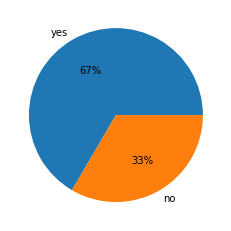

In [22]:
plt.pie(df2[df2.target!="test_set"].target.value_counts(), labels=['yes','no'], autopct='%0.0f%%')

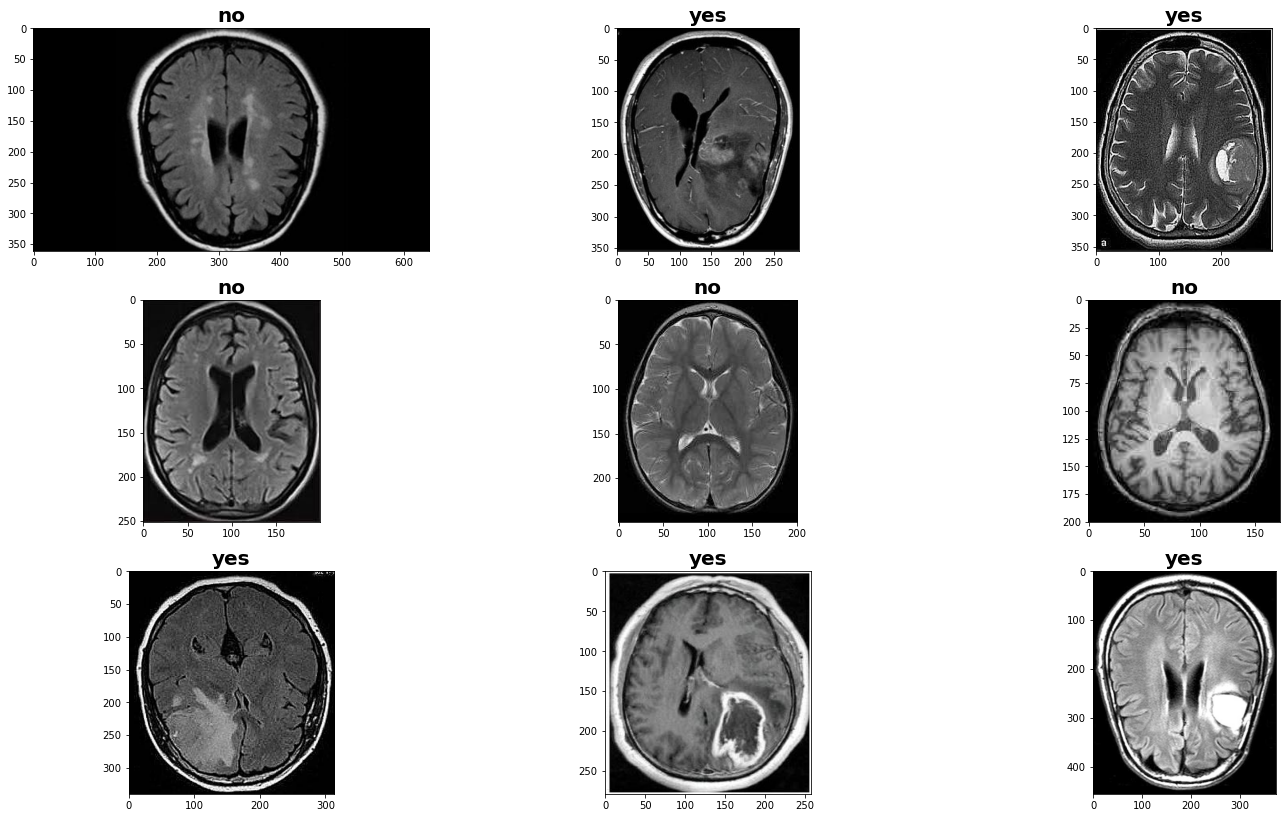

In [23]:
plt.figure(figsize=(20,15))
for i in range(9):
    plt.subplot(4,3,(i%12)+1)
    index=np.random.randint(3000)
    plt.title('{0}'.format(df.target[index]),fontdict={'size':20,'weight':'bold'})
    plt.imshow(df.image[index])
    plt.tight_layout()

In [24]:
# from sklearn.model_selection import train_test_split
# x, xval, y, yval = train_test_split(df.image, df.target, test_size=0.2, random_state=2018)

### Baseline Logistic Regression

In [85]:
from pathlib import Path
import os
import cv2
from sklearn.decomposition import PCA

trainpath = Path('/Users/nk/Documents/Metis/06 Deep Learning/Project/brain_tumor/training')
testpath = Path('/Users/nk/Documents/Metis/06 Deep Learning/Project/brain_tumor/test')

tr_labels = []
tr_pixels = []

for file in trainpath.glob('*/*.jpg'):
    tr_labels.append(os.path.dirname(file).split("/")[-1])
    images = cv2.imread(os.path.relpath(file))
    resized = cv2.resize(images, (250,250), interpolation=cv2.INTER_AREA)
    gray = cv2.cvtColor(resized, cv2.COLOR_BGR2GRAY)
    tr_pixels.append(gray.ravel())

te_labels = []
te_pixels = []

for file in testpath.glob('*/*.jpg'):
    te_labels.append(os.path.dirname(file).split("/")[-1])
    images = cv2.imread(os.path.relpath(file))
    resized = cv2.resize(images, (250,250), interpolation=cv2.INTER_AREA)
    gray = cv2.cvtColor(resized, cv2.COLOR_BGR2GRAY)
    te_pixels.append(gray.ravel())

In [113]:
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt

scaler = StandardScaler()
X_train = scaler.fit_transform(tr_pixels)
X_test = scaler.transform(te_pixels)

pca = PCA(n_components=2)

X_train_2PC = pca.fit_transform(X_train)
X_test_2PC = pca.transform(X_test)

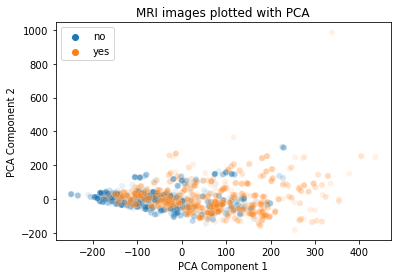

In [119]:
sns.scatterplot(x=X_train_2PC[:, 0], y=X_train_2PC[:, 1],hue=tr_labels, alpha=.1)
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.title("MRI images plotted with PCA")
plt.legend(loc=2);

In [116]:
from sklearn.linear_model import LogisticRegression

In [117]:
pca = PCA(n_components=0.8)

X_train_2PC = pca.fit_transform(X_train)
X_test_2PC = pca.transform(X_test)

lr = LogisticRegression()
lr.fit(X_train_2PC, tr_labels)
lr.score(X_test_2PC, te_labels)

0.53

### Setup for baseline CNN

In [25]:
test_dir = pathlib.Path("Brain_Tumor_Detection_pred")

In [26]:
batch = 32
img_height = 250
img_width = 250
img_size = (img_height, img_width)

train_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    batch_size=batch,
    labels='inferred',
    image_size=img_size,
    validation_split=0.25,
    subset='training',
    seed=2018,
    color_mode='grayscale'
)

validation_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    batch_size=batch,
    labels='inferred',
    image_size=img_size,
    validation_split=0.25,
    subset='validation',
    seed=2018,
    color_mode='grayscale'
)

test_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "Brain_Tumor_Detection_pred/",
    image_size=img_size,
    color_mode='grayscale'
)

Found 3000 files belonging to 2 classes.
Using 2250 files for training.
Found 3000 files belonging to 2 classes.
Using 750 files for validation.
Found 60 files belonging to 1 classes.


2021-11-30 21:38:22.868817: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2021-11-30 21:38:22.869340: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [27]:
imagegenerator = image.ImageDataGenerator(rescale=1./255)

In [28]:
train_gen = imagegenerator.flow_from_directory(
    data_dir,
    batch_size=batch,
    target_size=img_size,
    seed=2018,
    color_mode='grayscale',
    class_mode='binary'
)

test_gen = imagegenerator.flow_from_directory(
    "Brain_Tumor_Detection_pred/",
    batch_size=batch,
    target_size=img_size,
    color_mode='grayscale',
    class_mode='binary'
)

Found 3000 images belonging to 2 classes.
Found 60 images belonging to 1 classes.


In [29]:
list(train_dataset)

2021-11-30 21:38:23.134601: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:116] None of the MLIR optimization passes are enabled (registered 2)


[(<tf.Tensor: shape=(32, 250, 250, 1), dtype=float32, numpy=
  array([[[[4.50000000e+01],
           [4.58559990e+01],
           [4.60000000e+01],
           ...,
           [4.70000000e+01],
           [4.70000000e+01],
           [4.70000000e+01]],
  
          [[4.50000000e+01],
           [4.58559990e+01],
           [4.60000000e+01],
           ...,
           [4.70000000e+01],
           [4.70000000e+01],
           [4.70000000e+01]],
  
          [[4.50000000e+01],
           [4.58559990e+01],
           [4.60000000e+01],
           ...,
           [4.70000000e+01],
           [4.70000000e+01],
           [4.70000000e+01]],
  
          ...,
  
          [[4.60000000e+01],
           [4.68559990e+01],
           [4.70000000e+01],
           ...,
           [4.80000000e+01],
           [4.80000000e+01],
           [4.80000000e+01]],
  
          [[4.60000000e+01],
           [4.68559990e+01],
           [4.70000000e+01],
           ...,
           [4.80000000e+01],
           [4

### Baseline CNN

In [30]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, GlobalAveragePooling2D, InputLayer
from tensorflow.keras import optimizers

In [37]:
baseline = Sequential()

baseline.add(InputLayer(input_shape=(250,250,1)))

baseline.add(Conv2D(filters=32, kernel_size=3, activation='relu', padding='same'))
baseline.add(MaxPooling2D((2,2)))
baseline.add(Flatten())
baseline.add(Dense(1, activation='sigmoid'))

baseline.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [38]:
baseline.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 250, 250, 32)      320       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 125, 125, 32)      0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 500000)            0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 500001    
Total params: 500,321
Trainable params: 500,321
Non-trainable params: 0
_________________________________________________________________


In [39]:
baseline_cnn_result = baseline.fit_generator(train_gen, epochs=50, steps_per_epoch=100)

Epoch 1/50
100/100 [==============================] - 26s 254ms/step - loss: 0.9573 - accuracy: 0.7169


In [40]:
baseline = Sequential()

baseline.add(InputLayer(input_shape=(250,250,1)))

baseline.add(Conv2D(filters=32, kernel_size=3, activation='relu', padding='same'))
baseline.add(MaxPooling2D())

baseline.add(Conv2D(filters=32, kernel_size=3, activation='relu', padding='same'))

baseline.add(Conv2D(filters=64, kernel_size=3, activation='relu', padding='same'))

baseline.add(Conv2D(filters=64, kernel_size=5, activation='relu', padding='same'))
baseline.add(MaxPooling2D())

baseline.add(Conv2D(filters=10, kernel_size=7, activation='relu', padding='same'))
baseline.add(Flatten())
baseline.add(Dense(1, activation='sigmoid'))

baseline.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [41]:
baseline.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 250, 250, 32)      320       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 125, 125, 32)      0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 125, 125, 32)      9248      
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 125, 125, 64)      18496     
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 125, 125, 64)      102464    
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 62, 62, 64)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 62, 62, 10)       

In [42]:
baseline_cnn_result = baseline.fit_generator(train_gen, epochs=20, steps_per_epoch=25)

Epoch 1/20
25/25 [==============================] - 133s 5s/step - loss: 0.6488 - accuracy: 0.6461
Epoch 2/20
25/25 [==============================] - 130s 5s/step - loss: 0.6346 - accuracy: 0.6976
Epoch 3/20
25/25 [==============================] - 132s 5s/step - loss: 0.4454 - accuracy: 0.7972
Epoch 4/20
25/25 [==============================] - 133s 5s/step - loss: 0.3658 - accuracy: 0.8276
Epoch 5/20
25/25 [==============================] - 134s 5s/step - loss: 0.3079 - accuracy: 0.8727
Epoch 6/20
25/25 [==============================] - 134s 5s/step - loss: 0.2033 - accuracy: 0.9355
Epoch 7/20
25/25 [==============================] - 145s 6s/step - loss: 0.1604 - accuracy: 0.9315
Epoch 8/20
25/25 [==============================] - 136s 5s/step - loss: 0.2361 - accuracy: 0.9180
Epoch 9/20
25/25 [==============================] - 135s 5s/step - loss: 0.1389 - accuracy: 0.9466
Epoch 10/20
25/25 [==============================] - 135s 5s/step - loss: 0.0897 - accuracy: 0.9583
Epoch 11/

In [ ]:
baseline.save('baseline_cnn.h5')

In [121]:
predictions = baseline.predict(test_gen, verbose=1)

2/2 [==============================] - 3s 1s/step


In [127]:
predictions.round(0)

array([[0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.]], dtype=float32)